In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import pandas as pd
from sodapy import Socrata

In [7]:
client = Socrata("data.sfgov.org", None)

In [8]:
# dictionaries by sodapy.
results = client.get("nuek-vuh3", limit=2000)

In [9]:
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [10]:
results_df.head()

,call_number,unit_id,incident_number,call_type,call_date,watch_date,received_dttm,entry_dttm,dispatch_dttm,call_final_disposition,...,case_location,data_as_of,data_loaded_at,:@computed_region_ajp5_b2md,response_dttm,on_scene_dttm,available_dttm,hospital_dttm,call_type_group,transport_dttm
0,063520271,71,06099527,Medical Incident,2006-12-18T00:00:00.000,2006-12-18T00:00:00.000,2006-12-18T16:30:48.000,2006-12-18T16:32:45.000,2006-12-18T16:33:06.000,Other,...,"{'type': 'Point', 'coordinates': [-122.4158, 3...",2024-02-05T03:27:52.000,2024-02-05T10:56:25.000,23,NaN,NaN,NaN,NaN,NaN,NaN
1,063530078,E36,06099669,Alarms,2006-12-19T00:00:00.000,2006-12-19T00:00:00.000,2006-12-19T08:39:29.000,2006-12-19T08:40:48.000,2006-12-19T08:40:54.000,Other,...,"{'type': 'Point', 'coordinates': [-122.42636, ...",2024-02-05T03:27:52.000,2024-02-05T10:56:25.000,9,2006-12-19T08:42:32.000,2006-12-19T08:44:52.000,2006-12-19T08:56:48.000,NaN,NaN,NaN
2,063530311,M13,06099836,Medical Incident,2006-12-19T00:00:00.000,2006-12-19T00:00:00.000,2006-12-19T19:49:26.000,2006-12-19T19:52:04.000,2006-12-19T19:52:22.000,Other,...,"{'type': 'Point', 'coordinates': [-122.37266, ...",2024-02-05T03:27:52.000,2024-02-05T10:56:25.000,37,NaN,NaN,2006-12-19T19:54:02.000,NaN,NaN,NaN
3,063540281,T10,06100040,Alarms,2006-12-20T00:00:00.000,2006-12-20T00:00:00.000,2006-12-20T16:06:01.000,2006-12-20T16:07:03.000,2006-12-20T16:07:16.000,Other,...,"{'type': 'Point', 'coordinates': [-122.44015, ...",2024-02-05T03:27:52.000,2024-02-05T10:56:25.000,15,NaN,NaN,2006-12-20T16:08:35.000,NaN,NaN,NaN
4,063560404,E35,06100734,Alarms,2006-12-22T00:00:00.000,2006-12-22T00:00:00.000,2006-12-22T23:14:14.000,2006-12-22T23:17:02.000,2006-12-22T23:18:08.000,Other,...,"{'type': 'Point', 'coordinates': [-122.407486,...",2024-02-05T03:27:52.000,2024-02-05T10:56:25.000,34,NaN,NaN,2006-12-22T23:20:01.000,NaN,NaN,NaN


In [11]:
results_df.columns

Index(['call_number', 'unit_id', 'incident_number', 'call_type', 'call_date',
       'watch_date', 'received_dttm', 'entry_dttm', 'dispatch_dttm',
       'call_final_disposition', 'address', 'city', 'zipcode_of_incident',
       'battalion', 'station_area', 'box', 'original_priority', 'priority',
       'final_priority', 'als_unit', 'number_of_alarms', 'unit_type',
       'unit_sequence_in_call_dispatch', 'fire_prevention_district',
       'supervisor_district', 'neighborhoods_analysis_boundaries', 'rowid',
       'case_location', 'data_as_of', 'data_loaded_at',
       ':@computed_region_ajp5_b2md', 'response_dttm', 'on_scene_dttm',
       'available_dttm', 'hospital_dttm', 'call_type_group', 'transport_dttm'],
      dtype='object')

# Data Exploration

In [12]:
df=results_df

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   call_number                        2000 non-null   object
 1   unit_id                            2000 non-null   object
 2   incident_number                    2000 non-null   object
 3   call_type                          2000 non-null   object
 4   call_date                          2000 non-null   object
 5   watch_date                         2000 non-null   object
 6   received_dttm                      2000 non-null   object
 7   entry_dttm                         2000 non-null   object
 8   dispatch_dttm                      2000 non-null   object
 9   call_final_disposition             2000 non-null   object
 10  address                            1957 non-null   object
 11  city                               1937 non-null   object
 12  zipcod

### Searching for data 

In [19]:
df.filter(regex='date|dttm').head()

,call_date,watch_date,received_dttm,entry_dttm,dispatch_dttm,response_dttm,on_scene_dttm,available_dttm,hospital_dttm,transport_dttm
0,2006-12-18T00:00:00.000,2006-12-18T00:00:00.000,2006-12-18T16:30:48.000,2006-12-18T16:32:45.000,2006-12-18T16:33:06.000,NaN,NaN,NaN,NaN,NaN
1,2006-12-19T00:00:00.000,2006-12-19T00:00:00.000,2006-12-19T08:39:29.000,2006-12-19T08:40:48.000,2006-12-19T08:40:54.000,2006-12-19T08:42:32.000,2006-12-19T08:44:52.000,2006-12-19T08:56:48.000,NaN,NaN
2,2006-12-19T00:00:00.000,2006-12-19T00:00:00.000,2006-12-19T19:49:26.000,2006-12-19T19:52:04.000,2006-12-19T19:52:22.000,NaN,NaN,2006-12-19T19:54:02.000,NaN,NaN
3,2006-12-20T00:00:00.000,2006-12-20T00:00:00.000,2006-12-20T16:06:01.000,2006-12-20T16:07:03.000,2006-12-20T16:07:16.000,NaN,NaN,2006-12-20T16:08:35.000,NaN,NaN
4,2006-12-22T00:00:00.000,2006-12-22T00:00:00.000,2006-12-22T23:14:14.000,2006-12-22T23:17:02.000,2006-12-22T23:18:08.000,NaN,NaN,2006-12-22T23:20:01.000,NaN,NaN


- convert this date format to standard format
    - may be 'yy-mm-dd hh:mm:ss' format search for NaN - > understand why and convert to a format to work further


In [23]:
df.filter(like='number').head()

,call_number,incident_number,number_of_alarms
0,063520271,06099527,1
1,063530078,06099669,1
2,063530311,06099836,1
3,063540281,06100040,1
4,063560404,06100734,1


In [ ]:
- Understand what this number means, Make sure both number makes sense


In [25]:
len(df['call_number'].unique())

1998

In [27]:

len(df['incident_number'].unique())

1998

### Time Series Analysis:



- Analyze call trends over time (daily, weekly, monthly).
  - from time stamp create new column with week name, dayname, month name.
  - Create avg, median of week , month, day to see the trend
- Identify peak hours for different call types and priorities.

<Axes: xlabel='call_type'>

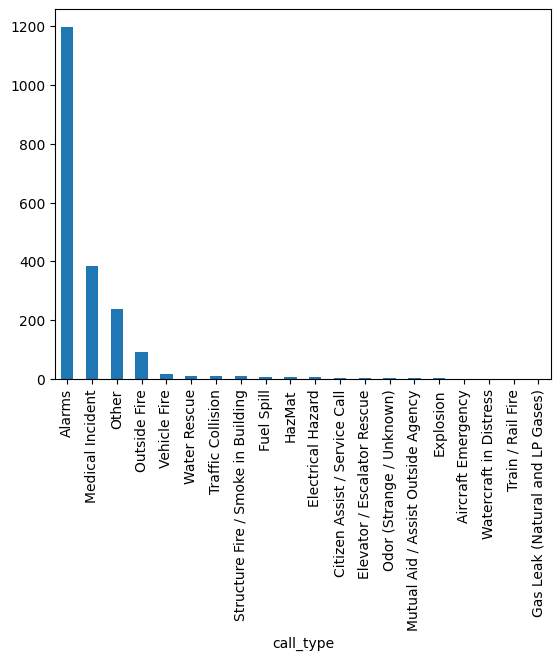

In [31]:
df['call_type'].value_counts().plot(kind='bar')

## Operational and Performance Analysis:

In [33]:
df.columns

Index(['call_number', 'unit_id', 'incident_number', 'call_type', 'call_date',
       'watch_date', 'received_dttm', 'entry_dttm', 'dispatch_dttm',
       'call_final_disposition', 'address', 'city', 'zipcode_of_incident',
       'battalion', 'station_area', 'box', 'original_priority', 'priority',
       'final_priority', 'als_unit', 'number_of_alarms', 'unit_type',
       'unit_sequence_in_call_dispatch', 'fire_prevention_district',
       'supervisor_district', 'neighborhoods_analysis_boundaries', 'rowid',
       'case_location', 'data_as_of', 'data_loaded_at',
       ':@computed_region_ajp5_b2md', 'response_dttm', 'on_scene_dttm',
       'available_dttm', 'hospital_dttm', 'call_type_group', 'transport_dttm'],
      dtype='object')

In [39]:
df['response_time'] = pd.to_datetime(df['response_dttm']) - pd.to_datetime(df['received_dttm'])
df['response_time'].describe()



count                         1599
mean     0 days 00:03:42.025015634
std      0 days 00:05:22.500674776
min                0 days 00:00:00
25%                0 days 00:02:30
50%                0 days 00:03:16
75%                0 days 00:04:10
max                0 days 03:00:56
Name: response_time, dtype: object

## Call Volume Analysis:
- Analyze the volume of calls by Call Type, Call Type Group, Priority, and Neighborhood District.
- Identify areas with the highest frequency of calls and the most common types of incidents.


## Resource Allocation:


- Examine the allocation of units to incidents and the sequence of dispatch.

- Analyze the utilization of different unit types (e.g., ALS units, Engine, Truck).

## 4. Performance Evaluation


#### Response Efficiency:



- Evaluate the response times against the expected or standard response times.
- Compare the performance of different units and stations.


## Outcome Analysis:



- Analyze the Call Final Disposition to evaluate the effectiveness of the response.
- Identify patterns in the final disposition of calls based on call type and priority.

5. Data Visualization
Trends and Patterns:
Time series plots for call volumes and response times.
Heatmaps to show the geographic distribution of incidents.
Response Time Analysis:
Box plots to compare response times across different call types and priorities.
Histograms to show the distribution of response times.
Operational Metrics:
Bar charts to display the frequency of different call types and outcomes.
Pie charts to show the proportion of calls by priority and unit type.
6. Reporting and Recommendations
Summary Report:
Summarize the key findings from the analysis.
Provide visualizations to support your conclusions.
Recommendations:
Based on the analysis, provide recommendations for improving response times, resource allocation, and overall operational efficiency.